In [287]:
import yfinance as yf
import datetime
from dateutil import rrule
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [288]:
# Download data from Yahoo API and clean data
today = datetime.date.today().isoformat()
start_date = '2009-09-17'

response_BTC  = pd.read_csv('Bitcoin-Historical-Data-Investing.com.csv')

response_SP500 = yf.download(
    "^GSPC", 
    start=start_date, 
    end=today
)


[*********************100%***********************]  1 of 1 completed


In [289]:
response_BTC


,Date,Close,Open,High,Low,Vol.,Change %
0,"Feb 03, 2023","23,632.5","23,429.1","23,691.2","23,262.8",391.09K,0.87%
1,"Feb 02, 2023","23,427.6","23,726.2","24,207.2","23,398.1",382.86K,-1.26%
2,"Feb 01, 2023","23,725.6","23,124.7","23,784.5","22,809.6",333.18K,2.60%
3,"Jan 31, 2023","23,125.1","22,832.2","23,262.9","22,724.9",289.38K,1.28%
4,"Jan 30, 2023","22,832.2","23,746.0","23,794.0","22,560.0",339.62K,-3.88%
...,...,...,...,...,...,...,...
4579,"Jul 22, 2010",0.1,0.1,0.1,0.1,2.16K,0.00%
4580,"Jul 21, 2010",0.1,0.1,0.1,0.1,0.58K,0.00%
4581,"Jul 20, 2010",0.1,0.1,0.1,0.1,0.26K,0.00%
4582,"Jul 19, 2010",0.1,0.1,0.1,0.1,0.57K,0.00%


In [290]:
response_SP500

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2009-09-17 00:00:00-04:00,1067.869995,1074.770020,1061.199951,1065.489990,1065.489990,6668110000
2009-09-18 00:00:00-04:00,1066.599976,1071.520020,1064.270020,1068.300049,1068.300049,5607970000
2009-09-21 00:00:00-04:00,1067.140015,1067.280029,1057.459961,1064.660034,1064.660034,4615280000
2009-09-22 00:00:00-04:00,1066.349976,1073.810059,1066.349976,1071.660034,1071.660034,5246600000
2009-09-23 00:00:00-04:00,1072.689941,1080.150024,1060.390015,1060.869995,1060.869995,5531930000
...,...,...,...,...,...,...
2023-01-30 00:00:00-05:00,4049.270020,4063.850098,4015.550049,4017.770020,4017.770020,3802000000
2023-01-31 00:00:00-05:00,4020.850098,4077.159912,4020.439941,4076.600098,4076.600098,4679320000
2023-02-01 00:00:00-05:00,4070.070068,4148.950195,4037.199951,4119.209961,4119.209961,4856930000


In [291]:
# trimming the data
price_BTC = response_BTC.drop(columns = ['Open', 'High', 'Low', 'Vol.', 'Change %'])
price_BTC = price_BTC.dropna()

In [292]:
price_BTC.dtypes

Date     object
Close    object
dtype: object

In [293]:
# trimming the data
price_SP500 = response_SP500.drop(columns = ['Open', 'High', 'Low', 'Adj Close', 'Volume'])
price_SP500 = price_SP500.dropna()

price_SP500.reset_index(inplace=True)

In [294]:
price_BTC["Close"] = price_BTC["Close"].str.replace(',','')
price_BTC["Close"] = price_BTC.Close.astype(float)
price_BTC['Pct Change'] = price_BTC['Close'].pct_change()

In [295]:
price_SP500["Close"] = price_SP500.Close.astype(float)
price_SP500['Pct Change'] = price_SP500['Close'].pct_change()

In [296]:
price_BTC['Date'] = pd.to_datetime(price_BTC['Date'])
price_BTC

,Date,Close,Pct Change
0,2023-02-03,23632.5,NaN
1,2023-02-02,23427.6,-0.008670
2,2023-02-01,23725.6,0.012720
3,2023-01-31,23125.1,-0.025310
4,2023-01-30,22832.2,-0.012666
...,...,...,...
4579,2010-07-22,0.1,0.000000
4580,2010-07-21,0.1,0.000000
4581,2010-07-20,0.1,0.000000
4582,2010-07-19,0.1,0.000000


In [297]:
price_SP500['Date'] = price_SP500['Date'].dt.tz_localize(None) 
price_SP500


,Date,Close,Pct Change
0,2009-09-17,1065.489990,NaN
1,2009-09-18,1068.300049,0.002637
2,2009-09-21,1064.660034,-0.003407
3,2009-09-22,1071.660034,0.006575
4,2009-09-23,1060.869995,-0.010069
...,...,...,...
3364,2023-01-30,4017.770020,-0.012969
3365,2023-01-31,4076.600098,0.014642
3366,2023-02-01,4119.209961,0.010452
3367,2023-02-02,4179.759766,0.014699


In [298]:
print(price_SP500.dtypes)
print(price_BTC.dtypes)

Date          datetime64[ns]
Close                float64
Pct Change           float64
dtype: object
Date          datetime64[ns]
Close                float64
Pct Change           float64
dtype: object


In [299]:
DB_df = merge=pd.merge(price_SP500,price_BTC, how='inner', on='Date')
DB_df.columns=["Date", "Close_SP500", "Pct_Change_SP500", "Close_BTC", "Pct_Change_BTC"]
DB_df.set_index('Date', inplace=True)
DB_df

,Close_SP500,Pct_Change_SP500,Close_BTC,Pct_Change_BTC
Date,,,,
2010-07-19,1071.250000,0.005982,0.1,0.000000
2010-07-20,1083.479980,0.011417,0.1,0.000000
2010-07-21,1069.589966,-0.012820,0.1,0.000000
2010-07-22,1093.670044,0.022513,0.1,0.000000
2010-07-23,1102.660034,0.008220,0.1,0.000000
...,...,...,...,...
2023-01-30,4017.770020,-0.012969,22832.2,-0.012666
2023-01-31,4076.600098,0.014642,23125.1,-0.025310
2023-02-01,4119.209961,0.010452,23725.6,0.012720


In [300]:
correlation = DB_df['Pct_Change_SP500'].corr(DB_df['Pct_Change_BTC'])
DB_df

,Close_SP500,Pct_Change_SP500,Close_BTC,Pct_Change_BTC
Date,,,,
2010-07-19,1071.250000,0.005982,0.1,0.000000
2010-07-20,1083.479980,0.011417,0.1,0.000000
2010-07-21,1069.589966,-0.012820,0.1,0.000000
2010-07-22,1093.670044,0.022513,0.1,0.000000
2010-07-23,1102.660034,0.008220,0.1,0.000000
...,...,...,...,...
2023-01-30,4017.770020,-0.012969,22832.2,-0.012666
2023-01-31,4076.600098,0.014642,23125.1,-0.025310
2023-02-01,4119.209961,0.010452,23725.6,0.012720


In [314]:

correlation = data_df['Pct_Change_SP500'].corr(data_df['Pct_Change_BTC'])
start = datetime.datetime(2011,1,1)
end = datetime.datetime(2022,12,31)
columns = ['Year', 'Corr']
years = []
corr = []
for dt in rrule.rrule(rrule.YEARLY, dtstart=start, until=end):
    print(dt)
    eoy = datetime.date(dt.year, 12, 30)
    data_df = DB_df[(DB_df.index > np.datetime64(dt)) & (DB_df.index <= np.datetime64(eoy))]
    correlation = data_df['Pct_Change_SP500'].corr(data_df['Pct_Change_BTC'])
    print(correlation)
    years.append(dt.year)
    corr.append(correlation)

correlation_df = pd.DataFrame()
correlation_df['Year'] = years
correlation_df['Corr'] = corr
correlation_df.set_index('Year', inplace=True)

2011-01-01 00:00:00
-0.05637799107036023
2012-01-01 00:00:00
0.02001190240677293
2013-01-01 00:00:00
-0.07361459043871822
2014-01-01 00:00:00
0.02625347979958131
2015-01-01 00:00:00
-0.06831595327497951
2016-01-01 00:00:00
0.03457457033377002
2017-01-01 00:00:00
-0.03906111944504582
2018-01-01 00:00:00
0.04721669552155726
2019-01-01 00:00:00
0.028300934271406113
2020-01-01 00:00:00
0.03545462764966391
2021-01-01 00:00:00
0.002741430283435498
2022-01-01 00:00:00
0.11821550737397589


In [315]:
correlation_df

,Corr
Year,
2011,-0.056378
2012,0.020012
2013,-0.073615
2014,0.026253
2015,-0.068316
2016,0.034575
2017,-0.039061
2018,0.047217
2019,0.028301


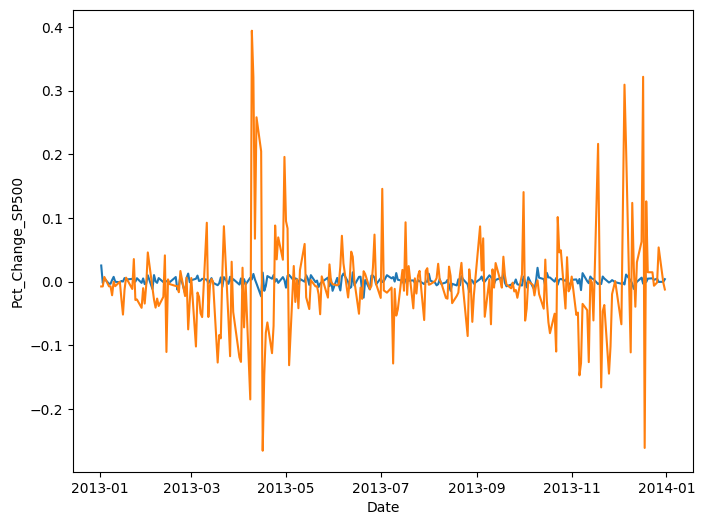

In [210]:
fig = plt.figure(figsize=(8,6))
sns.lineplot(data = data_df, x = 'Date', y = 'Pct_Change_SP500')
sns.lineplot(data = data_df, x = 'Date', y = 'Pct_Change_BTC')
plt.show()


In [228]:
rolling_corr = data_df['Pct_Change_SP500'].rolling(30).corr(data_df['Pct_Change_BTC'], pairwise=False)
rolling_corr.columns = ['Date','Corr']

In [229]:
rolling_corr
df = pd.DataFrame(rolling_corr).reset_index()
df.columns = ['Date', 'Corr']

In [230]:
df

,Date,Corr
0,2013-01-02,NaN
1,2013-01-03,NaN
2,2013-01-04,NaN
3,2013-01-07,NaN
4,2013-01-08,NaN
...,...,...
247,2013-12-24,-0.248454
248,2013-12-26,-0.280139
249,2013-12-27,-0.285322
250,2013-12-30,-0.282895


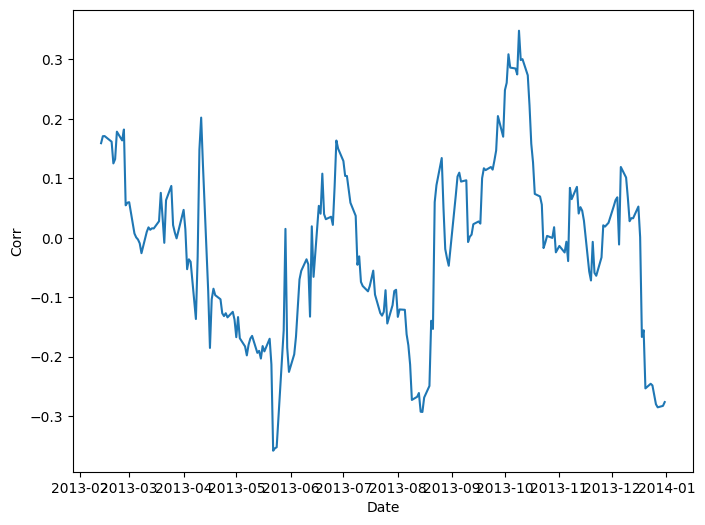

In [226]:
fig1 = plt.figure(figsize=(8,6))
sns.lineplot(data = df, x = 'Date', y = 'Corr')
plt.show()